In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
dataset = pd.read_csv("Startups.csv")


In [3]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

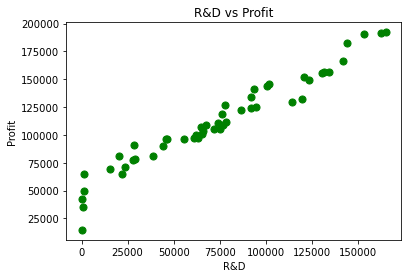

In [5]:
#Plotting R&D vs Profit
x1 = dataset.iloc[:, 0].values
y1 = dataset.iloc[:, -1].values
plt.scatter(x1,y1,color='Green',s=50)
plt.xlabel('R&D')
plt.ylabel('Profit')
plt.title('R&D vs Profit')
plt.show()

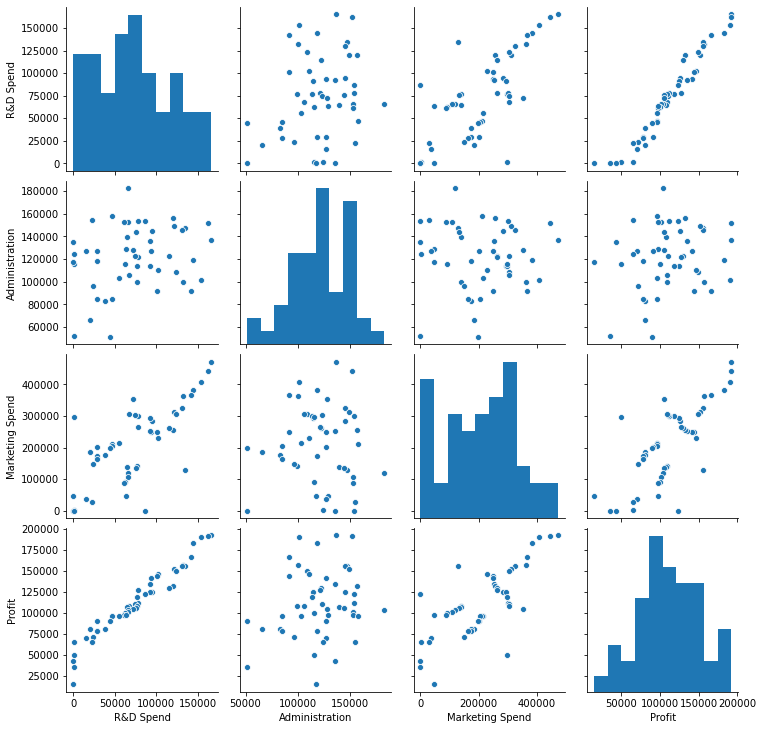

In [8]:
sn.pairplot(dataset)

In [24]:
dataset.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [12]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,4].values
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [13]:
# Dummy Trap
X = X[:,1:] 

In [14]:
# Splitting Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [15]:
from sklearn.linear_model import LinearRegression
red = LinearRegression()
red.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = reg.predict(X_test)

In [17]:
y_pred

array([103015.20159796, 132582.27760815, 132447.73845175,  71976.09851258,
       178537.48221056, 116161.24230166,  67851.69209676,  98791.73374687,
       113969.43533013, 167921.06569551])

In [18]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [20]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 7514.293659640891
MSE: 83502864.03257468
RMSE: 9137.990152794797


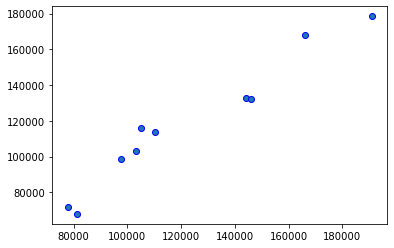

In [21]:
plt.scatter(y_test, y_pred, edgecolor='blue')


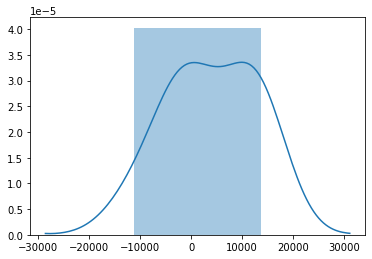

In [23]:
sn.distplot((y_test-y_pred))
